In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wave
import gensim
import soundfile as sf
import torch
from scipy.io import wavfile
from datasets import load_dataset
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

In [2]:
df = pd.read_csv('./data.csv')

In [3]:
df.head()

,track_name,artist_name,preview,artist_genre
0,Ghost,Justin Bieber,./data/Ghost,canadian pop pop
1,Shivers,Ed Sheeran,./data/Shivers,pop uk pop
2,Heat Waves,Glass Animals,./data/Heat Waves,gauze pop indietronica shiver pop
3,THATS WHAT I WANT,Lil Nas X,./data/THATS WHAT I WANT,lgbtq+ hip hop pop
4,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons,./data/Enemy (with JID) - from the series Arca...,modern rock rock


In [4]:
df['artist_genre'][0]

'canadian pop pop'

In [5]:
# gensim.utils.simple_preprocess(df['track_name'][3])

In [6]:
artist_genre = df.artist_genre.apply(gensim.utils.simple_preprocess)
artist_genre

0                                    [canadian, pop, pop]
1                                          [pop, uk, pop]
2                 [gauze, pop, indietronica, shiver, pop]
3                                  [lgbtq, hip, hop, pop]
4                                    [modern, rock, rock]
                              ...                        
3049                               [emo, pop, punk, rock]
3050                [alternative, metal, pop, punk, rock]
3051        [easycore, emo, pop, punk, punk, skate, punk]
3052    [alternative, rock, blues, rock, garage, rock,...
3053                      [grunge, permanent, wave, rock]
Name: artist_genre, Length: 3054, dtype: object

In [7]:
# model = gensim.models.Word2Vec(
#     window=10,
#     min_count=2,
#     workers=4
# )

In [8]:
# model.build_vocab(artist_genre, progress_per=1000)

In [9]:
# model.epochs

In [10]:
# model.corpus_count

In [11]:
# model.train(artist_genre, total_examples=model.corpus_count, epochs=model.epochs)

In [12]:
# model.save('./word_to_vec_artist_genre.model')
model = gensim.models.Word2Vec.load('./word_to_vec_artist_genre.model')

In [13]:
model.wv.most_similar('pop')

[('dance', 0.9937686920166016),
 ('teen', 0.9923031330108643),
 ('edm', 0.9889826774597168),
 ('uk', 0.9874886274337769),
 ('house', 0.9874818921089172),
 ('electropop', 0.9853269457817078),
 ('candy', 0.9844802021980286),
 ('viral', 0.9837290048599243),
 ('slap', 0.9835690855979919),
 ('electro', 0.9825674891471863)]

In [14]:
model.wv.similarity(w1='canadian', w2='metal')

0.93932027

In [15]:
model.wv.most_similar('jazz')

[('disco', 0.9991907477378845),
 ('quiet', 0.9991604685783386),
 ('storm', 0.9990485310554504),
 ('americana', 0.9990044832229614),
 ('drill', 0.9989538788795471),
 ('motown', 0.998943030834198),
 ('adult', 0.9988557696342468),
 ('ska', 0.9987288117408752),
 ('lo', 0.9986804127693176),
 ('and', 0.9986308217048645)]

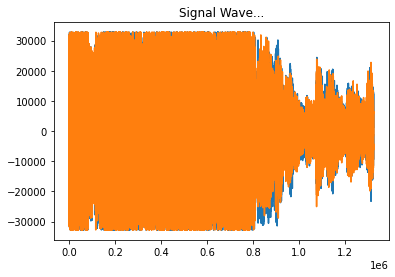

In [17]:
from scipy.io import wavfile
samplerate, data = wavfile.read('./random/Ghost.wav')



# plt.figure(1)
plt.title("Signal Wave...")
plt.plot(data)
plt.show()